# Twitter's impact on stock market prices

                                                                                                    - Hinal Desai (ML51414)

### Introduction

This project is done to analyze the impact of the tweets made for various companies on the stock price of those companies.
#### Hypothesis: Positive tweets help in increasing the stock price.
In this project we will try to prove for/against the hypothesis that we have.
The data has been taken from kaggle and the url for the same is: https://www.kaggle.com/code/saadusama/twitter-s-impact-on-stock-market-prices/data?select=Tweet.csv
There are various datasets here. Below is the description of each dataset.
This data is from 2015-2020


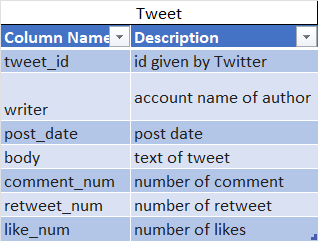
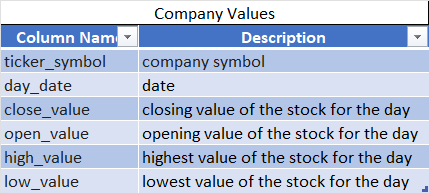
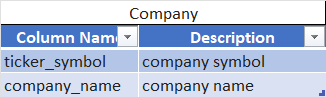
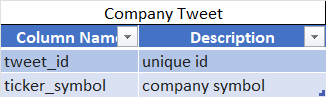

### Initial Requirements

In [1]:
#install library to check missing values
!pip install nltk

In [2]:
#importing libraries
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
import time
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment import SentimentIntensityAnalyzer
from matplotlib.pyplot import figure
print('Pandas',pd.__version__)

Pandas 1.3.4


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\hinal\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [3]:
#note the start time of the propram
start_time = time.time()

In [4]:
#read the data file
company = pd.read_csv('FinalProject//Company.csv', encoding='latin1')
company.name = "Company"
company_tweets = pd.read_csv('FinalProject//Company_Tweets.csv', encoding='latin1')
company_tweets.name = "Company_Tweets"
companyvalues = pd.read_csv('FinalProject//CompanyValues.csv', encoding='latin1')
companyvalues.name = "CompanyValues"
tweet = pd.read_csv('FinalProject//Tweet.csv', encoding='latin1')
tweet.name = "Tweet"

In [5]:
company.head()

,ticker_symbol,company_name
0,AAPL,apple
1,GOOG,Google Inc
2,GOOGL,Google Inc
3,AMZN,Amazon.com
4,TSLA,Tesla Inc


In [6]:
company_tweets.head()

,tweet_id,ticker_symbol
0,550453624258965505,AMZN
1,550499176422051840,AMZN
2,550650235404701697,AAPL
3,550650235404701697,AMZN
4,550650451948212224,AAPL


In [7]:
companyvalues.head()

,ticker_symbol,day_date,close_value,open_value,high_value,low_value
0,AAPL,5/29/2020,317.94,319.25,321.15,316.47
1,AAPL,5/28/2020,318.25,316.77,323.44,315.63
2,AAPL,5/27/2020,318.11,316.14,318.71,313.09
3,AAPL,5/26/2020,316.73,323.50,324.24,316.50
4,AAPL,5/22/2020,318.89,315.77,319.23,315.35


In [8]:
tweet.head()

,tweet_id,writer,post_date,body,comment_num,retweet_num,like_num
0,550453624258965505,WSJ,1420073345,Jeff Bezos lost $7.4 billion in Amazon's worst...,21,139,57
1,550499176422051840,WSJ,1420084206,Jeff Bezos lost $7.4 billion in Amazon's worst...,17,113,57
2,550650235404701697,greatspoke,1420120221,Analyst Report on Top Stock Market Options for...,0,430,3
3,550650235404701697,greatspoke,1420120221,Analyst Report on Top Stock Market Options for...,0,430,3
4,550650451948212224,greatspoke,1420120272,Top Stock Analyst Releases Report on Top Stock...,0,431,2


In [9]:
#check the number of rows and columns in the dataframe
print('Comapny: ', company.shape)
print('Comapny_Tweets: ', company_tweets.shape)
print('ComapnyValues: ', companyvalues.shape)
print('Tweet: ', tweet.shape)

Comapny:  (6, 2)
Comapny_Tweets:  (42003, 2)
ComapnyValues:  (17528, 6)
Tweet:  (42003, 7)


### CleanUp, Sanity check and removal of Data Inconsistencies

In [10]:
#Find number of non-null values and data type of each column in the dataframes
print(company.info(), '\n-----------------------------------------------------\n')
print(company_tweets.info(), '\n-----------------------------------------------------\n')
print(companyvalues.info(), '\n-----------------------------------------------------\n')
print(tweet.info(), '\n-----------------------------------------------------\n')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   ticker_symbol  6 non-null      object
 1   company_name   6 non-null      object
dtypes: object(2)
memory usage: 224.0+ bytes
None 
-----------------------------------------------------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42003 entries, 0 to 42002
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   tweet_id       42003 non-null  int64 
 1   ticker_symbol  42003 non-null  object
dtypes: int64(1), object(1)
memory usage: 656.4+ KB
None 
-----------------------------------------------------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17528 entries, 0 to 17527
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ticker_symbol  17528 non-nul

There are no null values in any of the columns for any dataframe. Hence there is no need for filling the missing values or dropping the null values. But the post_date column in the tweets dataframe is of epoch type and hence becomes difficult for the readers to interpret. We can convert that to datetime.

In [11]:
#converting epoch to datetime for post_date
#Convert to datetime and store value in a new column. Drop the existing post_date column
tweet["Date"] = pd.to_datetime(tweet['post_date'],unit='s').dt.strftime('%d-%m-%Y')
tweet["Date"] = pd.to_datetime(tweet["Date"])
tweet.drop(columns=['post_date'], inplace=True)
tweet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42003 entries, 0 to 42002
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   tweet_id     42003 non-null  int64         
 1   writer       41625 non-null  object        
 2   body         42003 non-null  object        
 3   comment_num  42003 non-null  int64         
 4   retweet_num  42003 non-null  int64         
 5   like_num     42003 non-null  int64         
 6   Date         42003 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(4), object(2)
memory usage: 2.2+ MB


Here we converted the epoch time to datetime and also converted the datatype of the newly added column. We also dropped the post_date column as it was not required. Now we check whether there are any columns that have same value for all the rows.

In [12]:
def same_value_check(df):
    counter = 0
    for this_column in df.columns:
        if (df[this_column].nunique()==1):
            print(this_column)
            counter = 1
    if(counter != 1):
        print('There are no such columns in', df.name, 'dataframe having the same value for all the rows.')

In [13]:
same_value_check(company)
same_value_check(company_tweets)
same_value_check(companyvalues)
same_value_check(tweet)

There are no such columns in Company dataframe having the same value for all the rows.
There are no such columns in Company_Tweets dataframe having the same value for all the rows.
There are no such columns in CompanyValues dataframe having the same value for all the rows.
There are no such columns in Tweet dataframe having the same value for all the rows.


Now lets get the number of uniques values per column and their counts.

In [14]:
#function to number of unique values and its count for all columns in a data frame
def uniq_per_col(df,count):
    for this_column in df.columns:
        print("==== ",this_column,"has",df[this_column].nunique(),"unique entries ====")
        print(df[this_column].value_counts().head(count))

In [15]:
uniq_per_col(company,5)
print('\n------------------------------------------------------------\n')
uniq_per_col(company_tweets,5)
print('\n------------------------------------------------------------\n')
uniq_per_col(companyvalues,5)
print('\n------------------------------------------------------------\n')
uniq_per_col(tweet,5)

====  ticker_symbol has 6 unique entries ====
AAPL     1
GOOG     1
GOOGL    1
AMZN     1
TSLA     1
Name: ticker_symbol, dtype: int64
====  company_name has 5 unique entries ====
Google Inc    2
apple         1
Amazon.com    1
Tesla Inc     1
Microsoft     1
Name: company_name, dtype: int64

------------------------------------------------------------

====  tweet_id has 38776 unique entries ====
1120193821495533568    5
1180827293930971136    5
935192666215796737     5
967229934187044865     5
1099705477531951109    5
Name: tweet_id, dtype: int64
====  ticker_symbol has 6 unique entries ====
TSLA     29451
AAPL      5244
AMZN      3683
GOOGL     1521
MSFT      1225
Name: ticker_symbol, dtype: int64

------------------------------------------------------------

====  ticker_symbol has 6 unique entries ====
AAPL     3085
AMZN     3085
GOOGL    3085
MSFT     3085
TSLA     3065
Name: ticker_symbol, dtype: int64
====  day_date has 3085 unique entries ====
5/29/2020     6
10/21/2014    6
1

From the above observations we can conclude that, data types of a few columns can be changed
1. Company Dataframe:
    Both ticker_symbol and company_name can be converted to category
2. Company_Tweets Dataframe:
    ticker_symbol can be converted to category
3. CompanyValues Dataframe:
    ticker_symbol can be converted to category,
    day_date can be converted to datetime
4. Tweets Dataframe:
    No change required

In [16]:
#convert the datatypes
company['ticker_symbol'] = company['ticker_symbol'].astype('category')
company['company_name'] = company['company_name'].astype('category')

company_tweets['ticker_symbol'] = company_tweets['ticker_symbol'].astype('category')

companyvalues['ticker_symbol'] = companyvalues['ticker_symbol'].astype('category')
companyvalues['day_date'] = companyvalues['day_date'].astype('datetime64[ns]')

In [17]:
#validate the datatypes
print(company.dtypes, '\n-----------------------------------------------------\n')
print(company_tweets.dtypes, '\n-----------------------------------------------------\n')
print(companyvalues.dtypes, '\n-----------------------------------------------------\n')

ticker_symbol    category
company_name     category
dtype: object 
-----------------------------------------------------

tweet_id            int64
ticker_symbol    category
dtype: object 
-----------------------------------------------------

ticker_symbol          category
day_date         datetime64[ns]
close_value             float64
open_value              float64
high_value              float64
low_value               float64
dtype: object 
-----------------------------------------------------



We have successfully converted the datatypes of the columns and the data is now clean and ready to use. Since there are no null values in any of the dataframes, we need not use the missing matrices.

We do not need the writer column as we are not using it for any visualization. Hence we can drop it.

In [18]:
tweet.drop(['writer'], axis=1, inplace= True)

#### Report

Assumptions: No Assumptions.

The column post_date in the tweets dataframe had epoch type of values for date. It is difficult to interpret such values. Hence we converted the values to datetime and also converted the datatype of the column to datetime for smoother functioning.
There were no columns where all the rows had the same value.
There were no columns where all the rows were null.
Hence there was no need to drop any column.
There were a few columns viz 'ticker_symbol', 'company_name' which had categorical data and hence their data type was updated for better functioning.
There was a 'day_date' column in companyvalues dataframe which had datetime type of data and hence its datatype was updated.
There are no null values in any of the columns of any of the dataframes.
We have also dropped the columns which are not being used for analysis.
The data is now clean and ready for analysis.

### Visualizations

The tweets dataframe has details about the tweets made for various companies, the date when the tweet was made, etc.
The companyvalues dataframe has the details of the stock price of various companies on a particular date.
The company dataframe has the names of the companies.
The company_tweets dataframe indicates the tweets for a company.

###### Hypothesis: Positive tweets help in increasing the stock price.

To prove this hypothesis our approach will be to detect whether a tweet made had positive impact or negative impact. For detecting whether a tweet has a positive or negative impact we will be doing semantic analysis. We will be using the nltk's pre-trained semantic analyzer.

The first step would be to analyze the semantics of tweets.

In [19]:
#function to detect sentiments
def sentimentanalyses(body):
    sia = SentimentIntensityAnalyzer()
    scores = sia.polarity_scores(body)
    if(scores.get('compound') >= 0.5):
        return('Positive')
    elif(scores.get('compound') <= -0.5):
        return('Negative')
    return('Neutral')

In [20]:
tweet['Sentiment'] = tweet['body'].apply(lambda x: sentimentanalyses(x))
tweet.head()

,tweet_id,body,comment_num,retweet_num,like_num,Date,Sentiment
0,550453624258965505,Jeff Bezos lost $7.4 billion in Amazon's worst...,21,139,57,2015-01-01,Negative
1,550499176422051840,Jeff Bezos lost $7.4 billion in Amazon's worst...,17,113,57,2015-01-01,Negative
2,550650235404701697,Analyst Report on Top Stock Market Options for...,0,430,3,2015-01-01,Neutral
3,550650235404701697,Analyst Report on Top Stock Market Options for...,0,430,3,2015-01-01,Neutral
4,550650451948212224,Top Stock Analyst Releases Report on Top Stock...,0,431,2,2015-01-01,Neutral


Now we have the sentiments for our tweets, lets join te various datasets together so that we can start our visualizations.

In [21]:
merge1 = pd.merge(pd.merge(tweet, company_tweets, on="tweet_id").drop_duplicates(), company, on='ticker_symbol')
merge2 = pd.merge(merge1, companyvalues, left_on= ['ticker_symbol', 'Date'], right_on=['ticker_symbol', 'day_date'])
merge2

,tweet_id,body,comment_num,retweet_num,like_num,Date,Sentiment,ticker_symbol,company_name,day_date,close_value,open_value,high_value,low_value
0,550453624258965505,Jeff Bezos lost $7.4 billion in Amazon's worst...,21,139,57,2015-01-01,Negative,AMZN,Amazon.com,2015-01-01,310.35,311.55,312.98,310.010
1,550499176422051840,Jeff Bezos lost $7.4 billion in Amazon's worst...,17,113,57,2015-01-01,Negative,AMZN,Amazon.com,2015-01-01,310.35,311.55,312.98,310.010
2,550650235404701697,Analyst Report on Top Stock Market Options for...,0,430,3,2015-01-01,Neutral,AMZN,Amazon.com,2015-01-01,310.35,311.55,312.98,310.010
3,550992290328875009,Analyst Report on Top Stock Market Options for...,0,350,0,2015-02-01,Neutral,AMZN,Amazon.com,2015-02-01,354.53,346.32,359.50,340.740
4,555341058021007360,Strong revenue growth and the prospect of impr...,2,35,16,2015-01-14,Positive,AMZN,Amazon.com,2015-01-14,293.27,291.93,295.91,286.503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41998,1212102520455208960,China is the biggest auto and EV market of the...,2,5,58,2019-12-31,Neutral,TSLA,Tesla Inc,2019-12-31,418.33,405.00,421.29,402.080
41999,1212102550327037952,What a nice little surprise to find at the gro...,39,23,521,2019-12-31,Positive,TSLA,Tesla Inc,2019-12-31,418.33,405.00,421.29,402.080
42000,1212110813093339141,"Dumb question, is this enough people to run a ...",4,3,49,2019-12-31,Negative,TSLA,Tesla Inc,2019-12-31,418.33,405.00,421.29,402.080
42001,1212111064730603521,My top picks for 2020 (in no particular order)...,11,8,66,2019-12-31,Neutral,TSLA,Tesla Inc,2019-12-31,418.33,405.00,421.29,402.080


We observe that the date column is twice and not needed, hence we can drop it.

In [22]:
merge2.drop(['day_date'], axis= 1, inplace= True)
merge2

,tweet_id,body,comment_num,retweet_num,like_num,Date,Sentiment,ticker_symbol,company_name,close_value,open_value,high_value,low_value
0,550453624258965505,Jeff Bezos lost $7.4 billion in Amazon's worst...,21,139,57,2015-01-01,Negative,AMZN,Amazon.com,310.35,311.55,312.98,310.010
1,550499176422051840,Jeff Bezos lost $7.4 billion in Amazon's worst...,17,113,57,2015-01-01,Negative,AMZN,Amazon.com,310.35,311.55,312.98,310.010
2,550650235404701697,Analyst Report on Top Stock Market Options for...,0,430,3,2015-01-01,Neutral,AMZN,Amazon.com,310.35,311.55,312.98,310.010
3,550992290328875009,Analyst Report on Top Stock Market Options for...,0,350,0,2015-02-01,Neutral,AMZN,Amazon.com,354.53,346.32,359.50,340.740
4,555341058021007360,Strong revenue growth and the prospect of impr...,2,35,16,2015-01-14,Positive,AMZN,Amazon.com,293.27,291.93,295.91,286.503
...,...,...,...,...,...,...,...,...,...,...,...,...,...
41998,1212102520455208960,China is the biggest auto and EV market of the...,2,5,58,2019-12-31,Neutral,TSLA,Tesla Inc,418.33,405.00,421.29,402.080
41999,1212102550327037952,What a nice little surprise to find at the gro...,39,23,521,2019-12-31,Positive,TSLA,Tesla Inc,418.33,405.00,421.29,402.080
42000,1212110813093339141,"Dumb question, is this enough people to run a ...",4,3,49,2019-12-31,Negative,TSLA,Tesla Inc,418.33,405.00,421.29,402.080
42001,1212111064730603521,My top picks for 2020 (in no particular order)...,11,8,66,2019-12-31,Neutral,TSLA,Tesla Inc,418.33,405.00,421.29,402.080


For viewing the impact of the tweets we need to get the engagement index. The formula for engagement index involves number of followers, but we do not have that data here. So lets assume the engagement index by the comments, retweets, and likes counts. Since retweets have the most impacts, followed by likes and then comments, we will give weightage accordingly.
The formula that I used is: 0.4*retweet + 0.35*likes + 0.25*comments
Also, if the sentiment is negative then make sure that the value is negative and if it is newtral then the value is 0.

In [23]:
merge2['EngagementIndex'] = 0.4*merge2['retweet_num'] + 0.35*merge2['like_num'] + 0.25*merge2['comment_num']
merge2.loc[merge2['Sentiment']=='Negative', 'EngagementIndex'] = -abs(merge2['EngagementIndex'])
merge2.loc[merge2['Sentiment']=='Neutral', 'EngagementIndex'] = 0
merge2

,tweet_id,body,comment_num,retweet_num,like_num,Date,Sentiment,ticker_symbol,company_name,close_value,open_value,high_value,low_value,EngagementIndex
0,550453624258965505,Jeff Bezos lost $7.4 billion in Amazon's worst...,21,139,57,2015-01-01,Negative,AMZN,Amazon.com,310.35,311.55,312.98,310.010,-80.80
1,550499176422051840,Jeff Bezos lost $7.4 billion in Amazon's worst...,17,113,57,2015-01-01,Negative,AMZN,Amazon.com,310.35,311.55,312.98,310.010,-69.40
2,550650235404701697,Analyst Report on Top Stock Market Options for...,0,430,3,2015-01-01,Neutral,AMZN,Amazon.com,310.35,311.55,312.98,310.010,0.00
3,550992290328875009,Analyst Report on Top Stock Market Options for...,0,350,0,2015-02-01,Neutral,AMZN,Amazon.com,354.53,346.32,359.50,340.740,0.00
4,555341058021007360,Strong revenue growth and the prospect of impr...,2,35,16,2015-01-14,Positive,AMZN,Amazon.com,293.27,291.93,295.91,286.503,20.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41998,1212102520455208960,China is the biggest auto and EV market of the...,2,5,58,2019-12-31,Neutral,TSLA,Tesla Inc,418.33,405.00,421.29,402.080,0.00
41999,1212102550327037952,What a nice little surprise to find at the gro...,39,23,521,2019-12-31,Positive,TSLA,Tesla Inc,418.33,405.00,421.29,402.080,201.30
42000,1212110813093339141,"Dumb question, is this enough people to run a ...",4,3,49,2019-12-31,Negative,TSLA,Tesla Inc,418.33,405.00,421.29,402.080,-19.35
42001,1212111064730603521,My top picks for 2020 (in no particular order)...,11,8,66,2019-12-31,Neutral,TSLA,Tesla Inc,418.33,405.00,421.29,402.080,0.00


Let us now begin the visualizations.
We will first consider visualizations for Apple

In [24]:
apple = merge2[merge2.ticker_symbol=='AAPL'] \
        .groupby(['Date']) \
        .agg(Company = ('company_name', 'first'),
            CloseValue = ('close_value', 'first'),
            OpenValue = ('open_value', 'first'),
            HighValue = ('high_value', 'first'),
            LowValue = ('low_value', 'first'),
            EngagementIndex = ('EngagementIndex', 'sum'))
apple.sort_values(by=['EngagementIndex'], ascending=False, inplace=True)
apple

,Company,CloseValue,OpenValue,HighValue,LowValue,EngagementIndex
Date,,,,,,
2018-02-08,apple,155.15,160.290,161.00,155.030,1062.35
2018-02-15,apple,172.99,169.790,173.09,169.000,689.05
2015-11-09,apple,120.57,120.960,121.81,120.050,454.55
2015-02-04,apple,119.56,118.500,120.51,118.309,450.15
2015-09-03,apple,110.37,112.490,112.78,110.040,446.95
...,...,...,...,...,...,...
2017-10-01,apple,154.12,153.210,154.13,152.000,-367.15
2016-02-03,apple,96.35,95.000,96.84,94.080,-371.70
2016-08-30,apple,106.00,105.800,106.50,105.500,-393.55


Here we observe that maximum positive tweets were made in February 2018 where as maximum negative tweets were made in March 2017 so let us visualize the graphs around those dates.

Text(0.5, 1.0, 'Apple Stock Price Trend')

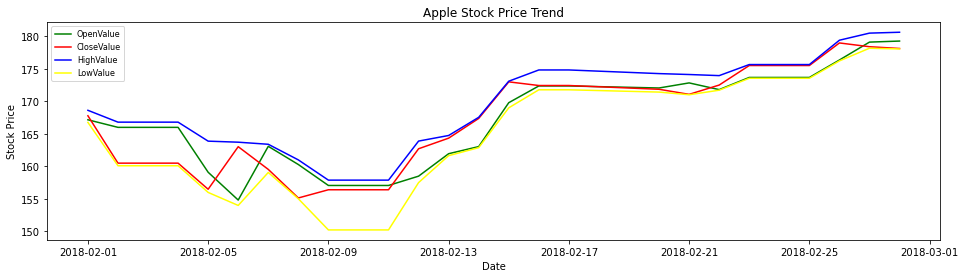

In [25]:
figure(figsize=(16, 4))
sns.lineplot(data = apple.loc['2018-02'], x = 'Date', y = 'OpenValue', color = 'green')
sns.lineplot(data = apple.loc['2018-02'], x = 'Date', y = 'CloseValue', color = 'red')
sns.lineplot(data = apple.loc['2018-02'], x = 'Date', y = 'HighValue', color = 'blue')
sns.lineplot(data = apple.loc['2018-02'], x = 'Date', y = 'LowValue', color = 'yellow')
plt.xlabel("Date" , fontsize = 10)
plt.ylabel("Stock Price" , fontsize = 10)
plt.legend(labels=["OpenValue","CloseValue","HighValue","LowValue"],fontsize = 8)
plt.title('Apple Stock Price Trend', fontsize = 12)

Text(0.5, 1.0, 'Apple Stock Price Trend')

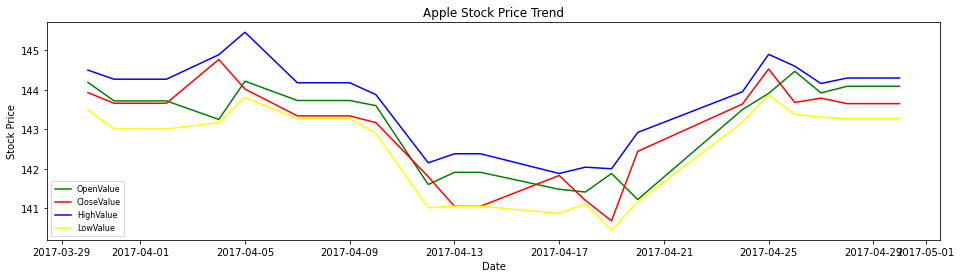

In [26]:
figure(figsize=(16, 4))
sns.lineplot(data = apple['2017-03-30':'2017-04-30'], x = 'Date', y = 'OpenValue', color = 'green')
sns.lineplot(data = apple['2017-03-30':'2017-04-30'], x = 'Date', y = 'CloseValue', color = 'red')
sns.lineplot(data = apple['2017-03-30':'2017-04-30'], x = 'Date', y = 'HighValue', color = 'blue')
sns.lineplot(data = apple['2017-03-30':'2017-04-30'], x = 'Date', y = 'LowValue', color = 'yellow')
plt.xlabel("Date" , fontsize = 10)
plt.ylabel("Stock Price" , fontsize = 10)
plt.legend(labels=["OpenValue","CloseValue","HighValue","LowValue"],fontsize = 8)
plt.title('Apple Stock Price Trend', fontsize = 12)

In the first graph we observe that after the tweet was made, the stock price kept on increasing.
Whereas in the second graph we observe that after the tweet was made, the stock price kept on decreasing for a few days.
Hence we can conclude that Apple stock prices are affected by the tweets.

Let us now move to visualizations for Google

In [27]:
google = merge2[((merge2.ticker_symbol=='GOOG') | (merge2.ticker_symbol=='GOOGL'))] \
        .groupby(['Date']) \
        .agg(Company = ('company_name', 'first'),
            CloseValue = ('close_value', 'first'),
            OpenValue = ('open_value', 'first'),
            HighValue = ('high_value', 'first'),
            LowValue = ('low_value', 'first'),
            EngagementIndex = ('EngagementIndex', 'sum'))
google.sort_values(by=['EngagementIndex'], ascending=False, inplace=True)
google

,Company,CloseValue,OpenValue,HighValue,LowValue,EngagementIndex
Date,,,,,,
2019-10-21,Google Inc,1246.15,1252.26,1254.6287,1240.6000,427.80
2015-04-13,Google Inc,539.17,538.41,544.0600,537.3100,421.05
2018-03-18,Google Inc,1135.73,1154.14,1155.8800,1131.9600,407.80
2018-07-20,Google Inc,1184.91,1186.96,1196.8600,1184.2200,313.55
2019-06-25,Google Inc,1086.35,1112.66,1114.3500,1083.8000,279.75
...,...,...,...,...,...,...
2017-03-09,Google Inc,857.84,853.69,860.7100,852.6700,-124.10
2018-12-29,Google Inc,1046.68,1059.50,1064.2300,1042.0000,-125.35
2018-08-12,Google Inc,1252.51,1259.18,1261.2000,1247.1635,-126.40


Here we observe that maximum positive tweets were made in October 2019 where as maximum negative tweets were made in March 2019 so let us visualize the graphs around those dates.

Text(0.5, 1.0, 'Google Stock Price Trend')

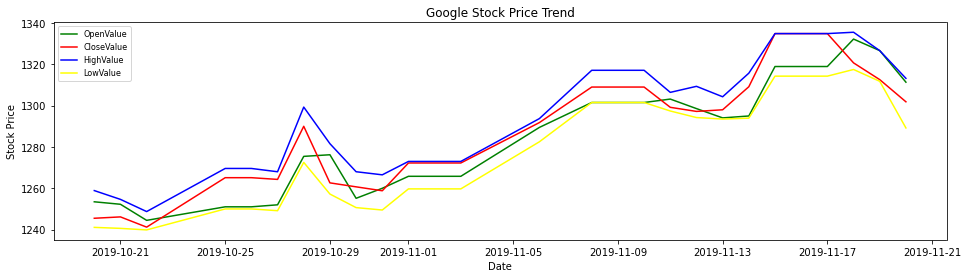

In [28]:
figure(figsize=(16, 4))
sns.lineplot(data = google['2019-10-20':'2019-11-20'], x = 'Date', y = 'OpenValue', color = 'green')
sns.lineplot(data = google['2019-10-20':'2019-11-20'], x = 'Date', y = 'CloseValue', color = 'red')
sns.lineplot(data = google['2019-10-20':'2019-11-20'], x = 'Date', y = 'HighValue', color = 'blue')
sns.lineplot(data = google['2019-10-20':'2019-11-20'], x = 'Date', y = 'LowValue', color = 'yellow')
plt.xlabel("Date" , fontsize = 10)
plt.ylabel("Stock Price" , fontsize = 10)
plt.legend(labels=["OpenValue","CloseValue","HighValue","LowValue"],fontsize = 8)
plt.title('Google Stock Price Trend', fontsize = 12)

Text(0.5, 1.0, 'Google Stock Price Trend')

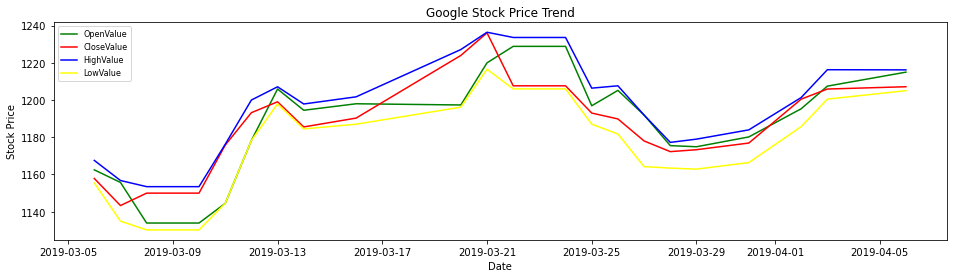

In [29]:
figure(figsize=(16, 4))
sns.lineplot(data = google['2019-03-06':'2019-04-06'], x = 'Date', y = 'OpenValue', color = 'green')
sns.lineplot(data = google['2019-03-06':'2019-04-06'], x = 'Date', y = 'CloseValue', color = 'red')
sns.lineplot(data = google['2019-03-06':'2019-04-06'], x = 'Date', y = 'HighValue', color = 'blue')
sns.lineplot(data = google['2019-03-06':'2019-04-06'], x = 'Date', y = 'LowValue', color = 'yellow')
plt.xlabel("Date" , fontsize = 10)
plt.ylabel("Stock Price" , fontsize = 10)
plt.legend(labels=["OpenValue","CloseValue","HighValue","LowValue"],fontsize = 8)
plt.title('Google Stock Price Trend', fontsize = 12)

In the first graph we observe that after the tweet was made, the stock price kept on increasing.
Whereas in the second graph we observe that after the tweet was made, the stock price still kept on increasing for a few days.
Hence we can conclude that Google stock prices might not be highly affected by the tweets.

Let us now move to visualizations for Amazon

In [30]:
amazon = merge2[merge2.ticker_symbol=='AMZN'] \
        .groupby(['Date']) \
        .agg(Company = ('company_name', 'first'),
            CloseValue = ('close_value', 'first'),
            OpenValue = ('open_value', 'first'),
            HighValue = ('high_value', 'first'),
            LowValue = ('low_value', 'first'),
            EngagementIndex = ('EngagementIndex', 'sum'))
amazon.sort_values(by=['EngagementIndex'], ascending=False, inplace=True)
amazon

,Company,CloseValue,OpenValue,HighValue,LowValue,EngagementIndex
Date,,,,,,
2018-12-03,Amazon.com,1772.36,1769.460,1778.340,1730.0000,710.15
2018-04-27,Amazon.com,1572.62,1634.010,1638.100,1567.3860,523.15
2017-07-27,Amazon.com,1046.00,1069.550,1083.310,1040.1800,482.05
2019-02-19,Amazon.com,1627.58,1601.000,1634.000,1600.5600,390.75
2018-03-12,Amazon.com,1598.39,1592.600,1605.330,1586.7000,377.30
...,...,...,...,...,...,...
2019-01-31,Amazon.com,1718.73,1692.850,1736.411,1679.0821,-196.10
2018-05-22,Amazon.com,1581.40,1589.890,1589.890,1575.2500,-231.20
2019-11-15,Amazon.com,1739.49,1760.050,1761.680,1732.8600,-238.60


Here we observe that maximum positive tweets were made in December 2018 where as maximum negative tweets were made in February 2017 so let us visualize the graphs around those dates.

Text(0.5, 1.0, 'Amazon Stock Price Trend')

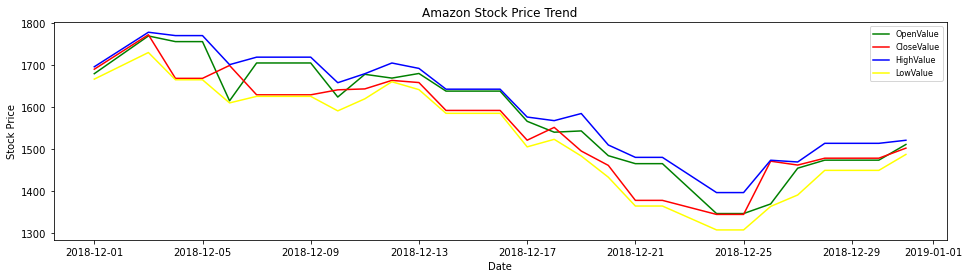

In [31]:
figure(figsize=(16, 4))
sns.lineplot(data = amazon.loc['2018-12'], x = 'Date', y = 'OpenValue', color = 'green')
sns.lineplot(data = amazon.loc['2018-12'], x = 'Date', y = 'CloseValue', color = 'red')
sns.lineplot(data = amazon.loc['2018-12'], x = 'Date', y = 'HighValue', color = 'blue')
sns.lineplot(data = amazon.loc['2018-12'], x = 'Date', y = 'LowValue', color = 'yellow')
plt.xlabel("Date" , fontsize = 10)
plt.ylabel("Stock Price" , fontsize = 10)
plt.legend(labels=["OpenValue","CloseValue","HighValue","LowValue"],fontsize = 8)
plt.title('Amazon Stock Price Trend', fontsize = 12)

Text(0.5, 1.0, 'Amazon Stock Price Trend')

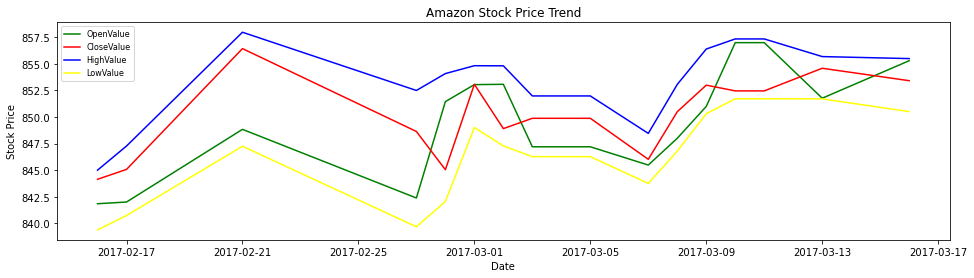

In [32]:
figure(figsize=(16, 4))
sns.lineplot(data = amazon['2017-02-16':'2017-03-16'], x = 'Date', y = 'OpenValue', color = 'green')
sns.lineplot(data = amazon['2017-02-16':'2017-03-16'], x = 'Date', y = 'CloseValue', color = 'red')
sns.lineplot(data = amazon['2017-02-16':'2017-03-16'], x = 'Date', y = 'HighValue', color = 'blue')
sns.lineplot(data = amazon['2017-02-16':'2017-03-16'], x = 'Date', y = 'LowValue', color = 'yellow')
plt.xlabel("Date" , fontsize = 10)
plt.ylabel("Stock Price" , fontsize = 10)
plt.legend(labels=["OpenValue","CloseValue","HighValue","LowValue"],fontsize = 8)
plt.title('Amazon Stock Price Trend', fontsize = 12)

Here the trends are weird. In the first graph, after the positive tweet, the stock price went on decreasing where as in the second graph, after the negative comment, the stock price increased a bit.
This clearly states that Amazon stock prices are not at all affected by the tweets.

Let us now move to visualizations for Tesla

In [33]:
tesla = merge2[merge2.ticker_symbol=='TSLA'] \
        .groupby(['Date']) \
        .agg(Company = ('company_name', 'first'),
            CloseValue = ('close_value', 'first'),
            OpenValue = ('open_value', 'first'),
            HighValue = ('high_value', 'first'),
            LowValue = ('low_value', 'first'),
            EngagementIndex = ('EngagementIndex', 'sum'))
tesla.sort_values(by=['EngagementIndex'], ascending=False, inplace=True)
tesla

,Company,CloseValue,OpenValue,HighValue,LowValue,EngagementIndex
Date,,,,,,
2018-10-24,Tesla Inc,288.50,301.05,304.44,285.7300,2492.05
2019-12-16,Tesla Inc,381.50,362.55,383.61,362.5000,1974.45
2019-10-24,Tesla Inc,299.68,298.37,304.93,289.2000,1881.20
2019-12-23,Tesla Inc,419.22,411.78,422.01,410.0000,1846.90
2018-01-10,Tesla Inc,334.80,332.20,337.00,330.0000,1542.10
...,...,...,...,...,...,...
2019-03-26,Tesla Inc,267.77,264.44,270.26,264.4300,-421.10
2019-12-04,Tesla Inc,333.03,337.75,337.86,332.8500,-464.85
2018-07-23,Tesla Inc,303.20,301.84,305.50,292.8601,-605.40


Here we observe that maximum positive tweets were made in October 2018 where as maximum negative tweets were made in January 2017 so let us visualize the graphs around those dates.

Text(0.5, 1.0, 'Tesla Stock Price Trend')

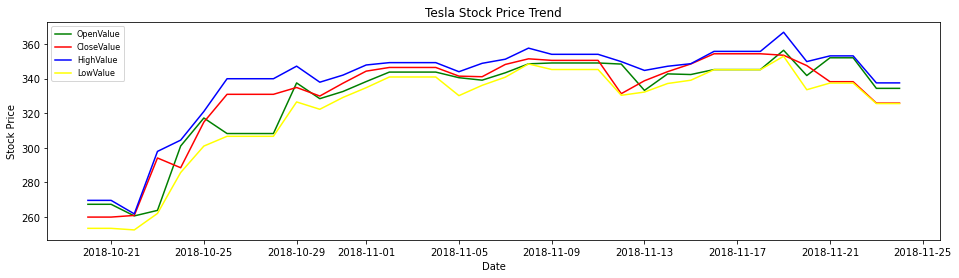

In [34]:
figure(figsize=(16, 4))
sns.lineplot(data = tesla['2018-10-20':'2018-11-24'], x = 'Date', y = 'OpenValue', color = 'green')
sns.lineplot(data = tesla['2018-10-20':'2018-11-24'], x = 'Date', y = 'CloseValue', color = 'red')
sns.lineplot(data = tesla['2018-10-20':'2018-11-24'], x = 'Date', y = 'HighValue', color = 'blue')
sns.lineplot(data = tesla['2018-10-20':'2018-11-24'], x = 'Date', y = 'LowValue', color = 'yellow')
plt.xlabel("Date" , fontsize = 10)
plt.ylabel("Stock Price" , fontsize = 10)
plt.legend(labels=["OpenValue","CloseValue","HighValue","LowValue"],fontsize = 8)
plt.title('Tesla Stock Price Trend', fontsize = 12)

Text(0.5, 1.0, 'Tesla Stock Price Trend')

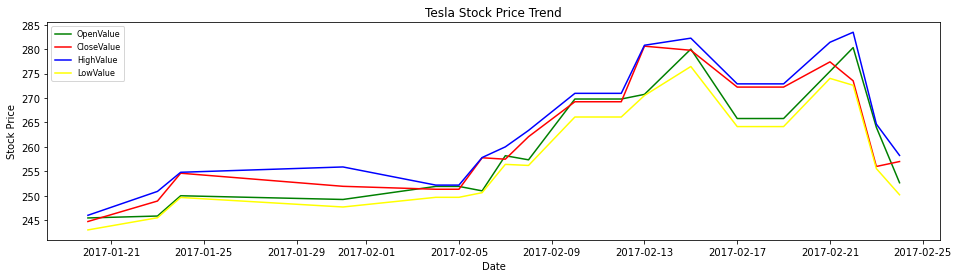

In [35]:
figure(figsize=(16, 4))
sns.lineplot(data = tesla['2017-01-20':'2017-02-24'], x = 'Date', y = 'OpenValue', color = 'green')
sns.lineplot(data = tesla['2017-01-20':'2017-02-24'], x = 'Date', y = 'CloseValue', color = 'red')
sns.lineplot(data = tesla['2017-01-20':'2017-02-24'], x = 'Date', y = 'HighValue', color = 'blue')
sns.lineplot(data = tesla['2017-01-20':'2017-02-24'], x = 'Date', y = 'LowValue', color = 'yellow')
plt.xlabel("Date" , fontsize = 10)
plt.ylabel("Stock Price" , fontsize = 10)
plt.legend(labels=["OpenValue","CloseValue","HighValue","LowValue"],fontsize = 8)
plt.title('Tesla Stock Price Trend', fontsize = 12)

Here we see that, after the positive tweet, the stock price increased drastically, whereas after the negative tweet, there was a slight dip in the stock price for a few days.
Hence it is evident that, Tesla stocks are affected by the tweets.

Let us now move to visualizations for Microsoft

In [36]:
microsoft = merge2[merge2.ticker_symbol=='MSFT'] \
        .groupby(['Date']) \
        .agg(Company = ('company_name', 'first'),
            CloseValue = ('close_value', 'first'),
            OpenValue = ('open_value', 'first'),
            HighValue = ('high_value', 'first'),
            LowValue = ('low_value', 'first'),
            EngagementIndex = ('EngagementIndex', 'sum'))
microsoft.sort_values(by=['EngagementIndex'], ascending=False, inplace=True)
microsoft

,Company,CloseValue,OpenValue,HighValue,LowValue,EngagementIndex
Date,,,,,,
2018-08-05,Microsoft,108.04,107.80,108.050,106.82,372.25
2019-04-29,Microsoft,129.77,129.90,130.180,129.35,366.35
2019-11-22,Microsoft,149.59,150.07,150.300,148.82,347.50
2019-04-25,Microsoft,129.15,130.06,131.370,128.83,315.50
2018-02-22,Microsoft,91.73,92.05,92.730,91.36,275.15
...,...,...,...,...,...,...
2016-06-13,Microsoft,50.14,49.58,50.715,49.06,-76.30
2015-06-17,Microsoft,45.97,45.73,46.070,45.36,-85.35
2018-10-10,Microsoft,106.16,111.24,111.500,105.79,-100.50


Here we observe that maximum positive tweets were made in August 2018 where as maximum negative tweets were made in March 2017 so let us visualize the graphs around those dates.

Text(0.5, 1.0, 'Microsoft Stock Price Trend')

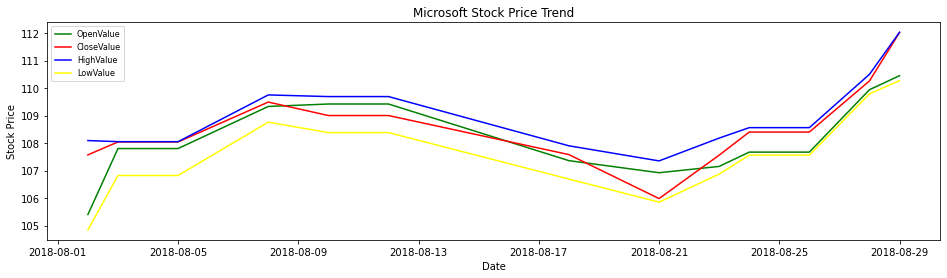

In [37]:
figure(figsize=(16, 4))
sns.lineplot(data = microsoft.loc['2018-08'], x = 'Date', y = 'OpenValue', color = 'green')
sns.lineplot(data = microsoft.loc['2018-08'], x = 'Date', y = 'CloseValue', color = 'red')
sns.lineplot(data = microsoft.loc['2018-08'], x = 'Date', y = 'HighValue', color = 'blue')
sns.lineplot(data = microsoft.loc['2018-08'], x = 'Date', y = 'LowValue', color = 'yellow')
plt.xlabel("Date" , fontsize = 10)
plt.ylabel("Stock Price" , fontsize = 10)
plt.legend(labels=["OpenValue","CloseValue","HighValue","LowValue"],fontsize = 8)
plt.title('Microsoft Stock Price Trend', fontsize = 12)

Text(0.5, 1.0, 'Microsoft Stock Price Trend')

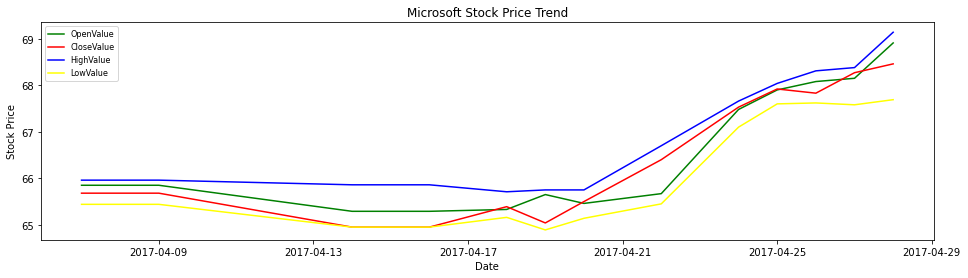

In [38]:
figure(figsize=(16, 4))
sns.lineplot(data = microsoft.loc['2017-04'], x = 'Date', y = 'OpenValue', color = 'green')
sns.lineplot(data = microsoft.loc['2017-04'], x = 'Date', y = 'CloseValue', color = 'red')
sns.lineplot(data = microsoft.loc['2017-04'], x = 'Date', y = 'HighValue', color = 'blue')
sns.lineplot(data = microsoft.loc['2017-04'], x = 'Date', y = 'LowValue', color = 'yellow')
plt.xlabel("Date" , fontsize = 10)
plt.ylabel("Stock Price" , fontsize = 10)
plt.legend(labels=["OpenValue","CloseValue","HighValue","LowValue"],fontsize = 8)
plt.title('Microsoft Stock Price Trend', fontsize = 12)

In the first graph we observe that after the tweet was made, the stock price kept on increasing.
Whereas in the second graph we observe that after the tweet was made, the stock price kept on decreasing for a few days.
Hence we can conclude that Microsoft stock prices are affected by the tweets.

#### Story of patterns observed.

By the above visualizations we figure that:
    1. Apple stocks are affected by the tweets.
    2. Google stocks are slightly affected by the tweets.
    3. Amazon stocks are nt affected by the tweets.
    4. Tesla stocks are affected by the tweets.
    5. Microsoft stocks are affected by the tweets.
Though the trends might not be only because of the tweets and there might be various reasons behind it, but it is safe to assume that tweets can be one of the reason.
Since we were revolving around just tweets made on one day, our observations might be a little skewed but overall it would be safe to conclude that Stock prices are highly affected by the tweets.
Hence our hypothesis is correct.

#### Learnings from the Project
1. Learnt the various visualization techniques.
2. Learnt the various ways of cleaning data, performing sanity checks and removing data inconsistencies.
3. Learnt the importance and applications of semantic analysis.
4. Learnt the various concepts in python like groupby, join, etc.

In [39]:
#Print the execution time taken by the program
print('The notebook took', round((time.time() - start_time)/60, 2),'minutes to complete the execution.')

The notebook took 3.92 minutes to complete the execution.
